# Lab 7-2: Mixing and dye-dilution discharge





---

This lab gives an example of how to use a bulk injection of flourescent dye, measure its concentration over time, and determine discharge in a river.

This uses the third of four attempts at Glen Aulin in June 2005.  Use the excel file and the worksheet from the main module to assess the entire situation more qualitatively.  



In [1]:
# Importing python packages you'll need for this lab:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy import sparse
import matplotlib.pyplot as plt
%matplotlib inline

Load the data file

In [2]:
df = pd.read_csv('Dye_data_GA050630c.csv', comment='#')
df.head(3)

sec_after_inj  min_after_inj  DateTime  Rwt_in_stream_ug_per_L  dt_sec
0              0            0.0  15:39:02                     0.0     NaN
1              0            0.0  15:39:12                     0.0     0.0
2              0            0.0  15:39:22                     0.0     0.0

## Plot the weight of dye in the stream as a function of minutes after the injection

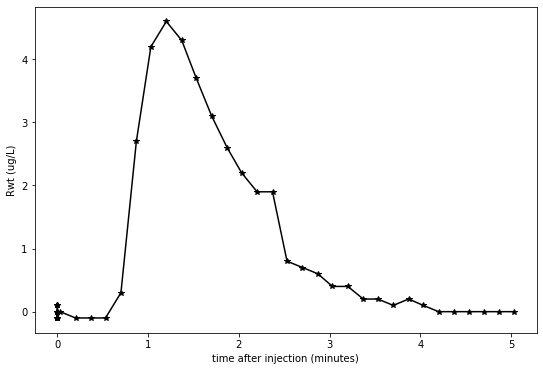

In [3]:
# create the figure and label the axes
plt.figure(figsize=(9,6))

plt.xlabel('time after injection (minutes)')
plt.ylabel('Rwt (ug/L)')
plt.plot(df.min_after_inj,df.Rwt_in_stream_ug_per_L,'k-*')


The above graph shows us the timeseries of measurements made downstream.  If we presume that the dischage is constant over the time period of measurement (which is generally reasonable for about 5 minutes), and that all of the tracer passes our measurement location, then the total area under the tracer curve above times the discharge that has diluted it should give us the orignal amount we put in:
$$ V = Q\int{RC(t)dt} $$
where V is the total mass of tracer injected, Q is the discharge, and RC is the concentration of tracer measured at each time step t.

In [4]:
# the measured amount of tracer we injected, in micrograms of active ingredient
# here we weighted 109.7 grams of a 20% solution.  The sensor measures micrograms per liter
V = 109.7*0.2*1000000 
intRC = np.sum(df.Rwt_in_stream_ug_per_L*df.dt_sec)
print(intRC)
Q = V/intRC
print(Q)

348.9
62883.34766408714


The above gives us discharge in liters per second

In [5]:
# We can convert this to cubic meters per second
Qcms = Q/1000
print(Qcms)

62.88334766408714


---
The above gives our estimate of discharge in cms.

In [6]:
# We can also convert this to cubic feet per second
Qcfs = Q*0.0353147
print(Qcfs)

2220.706557752938


The above is discharge is cfs.